Подключение библиотек

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from PIL import Image

Запись данных о тренировочных и тестовых данных в датафреймы

Формирование тренировочного датафрейма

In [50]:
p = Path('data/images')
list_name_img = []
list_var_arr = []
for x in p.glob("*"):
    x_rprefix = str(x).removeprefix('data\images\\')
    x_rprefix = x_rprefix[:10]
    list_name_img.append(x_rprefix)

    img = Image.open(x)
    img_resize = img.resize((32, 32))
    list_var_arr.append(np.array(img_resize) / 255.0)

list_name_img_df = pd.DataFrame({'id': list_name_img, 'val_arr': list_var_arr})


train_df = pd.read_csv('data/train.csv')
train_df_id = train_df['id'].str[:10]
train_df_target = train_df['target']
train_df_new = pd.concat([train_df_id, train_df_target], axis=1)


result_train_df = pd.merge(train_df_new, list_name_img_df, on='id', how='left')
result_train_df

,id,target,val_arr
0,gL5fWrgNPU,0,"[[[0.45098039215686275, 0.3764705882352941, 0...."
1,KKWXJDN8uM,1,"[[[0.9254901960784314, 0.9254901960784314, 0.9..."
2,Wb2I0CXlAY,0,"[[[0.13333333333333333, 0.11372549019607843, 0..."
3,G7PLhKpaf7,1,"[[[0.10588235294117647, 0.09411764705882353, 0..."
4,DEUkeefz6Z,0,"[[[0.3333333333333333, 0.39215686274509803, 0...."
...,...,...,...
1007,fqoVycdxLV,1,"[[[0.8588235294117647, 0.9333333333333333, 0.9..."
1008,TN2ZOiNI5e,0,"[[[0.2901960784313726, 0.15294117647058825, 0...."
1009,2WMWt6CAWQ,0,"[[[0.01568627450980392, 0.0196078431372549, 0...."
1010,fQCY5n2vcF,0,"[[[0.24705882352941178, 0.2235294117647059, 0...."


Формирование тестового датафрейма

In [51]:
test_df = pd.read_csv('data/test.csv')
test_images_df = pd.DataFrame(test_df['id'].str[:10])

result_test_df = pd.merge(test_images_df, list_name_img_df, on='id', how='left')

result_train_df[['val_arr']], result_test_df[['val_arr']]

(                                                val_arr
 0     [[[0.45098039215686275, 0.3764705882352941, 0....
 1     [[[0.9254901960784314, 0.9254901960784314, 0.9...
 2     [[[0.13333333333333333, 0.11372549019607843, 0...
 3     [[[0.10588235294117647, 0.09411764705882353, 0...
 4     [[[0.3333333333333333, 0.39215686274509803, 0....
 ...                                                 ...
 1007  [[[0.8588235294117647, 0.9333333333333333, 0.9...
 1008  [[[0.2901960784313726, 0.15294117647058825, 0....
 1009  [[[0.01568627450980392, 0.0196078431372549, 0....
 1010  [[[0.24705882352941178, 0.2235294117647059, 0....
 1011  [[[0.6392156862745098, 0.5725490196078431, 0.4...
 
 [1012 rows x 1 columns],
                                                val_arr
 0    [[[0.09019607843137255, 0.1411764705882353, 0....
 1    [[[0.3843137254901961, 0.4549019607843137, 0.4...
 2    [[[0.4588235294117647, 0.42745098039215684, 0....
 3    [[[0.3058823529411765, 0.5333333333333333, 0.6...
 4    [[

Формирование тренировочных и тестовых массивов 

In [52]:
all_images = result_train_df['val_arr'].to_numpy()
train_images = all_images[:800]
test_images = all_images[800:]

all_labels = result_train_df['target'].to_numpy()
train_labels = all_labels[:800]
test_labels = all_labels[800:]

t_images = result_test_df['val_arr'].to_numpy()

In [53]:
train_img = np.zeros([train_images.shape[0], train_images[0].shape[0], train_images[0].shape[1], train_images[0].shape[2] + 1], dtype=np.float32)

for i in range(train_images.shape[0]):
    if train_images[i].shape[2] == 3:
        train_img[i, :, :, :3] = train_images[i]
    else:
        train_img[i, :, :, :4] = train_images[i]


test_img = np.zeros([test_images.shape[0], test_images[0].shape[0], test_images[0].shape[1], test_images[0].shape[2] + 1], dtype=np.float32)

for i in range(test_images.shape[0]):
    if test_images[i].shape[2] == 3:
        test_img[i, :, :, :3] = test_images[i]
    else:
        test_img[i, :, :, :4] = test_images[i]

t_img = np.zeros([t_images.shape[0], t_images[0].shape[0], t_images[0].shape[1], t_images[0].shape[2] + 1], dtype=np.float32)

for i in range(t_images.shape[0]):
    if t_images[i].shape[2] == 3:
        t_img[i, :, :, :3] = t_images[i]
    else:
        t_img[i, :, :, :4] = t_images[i]

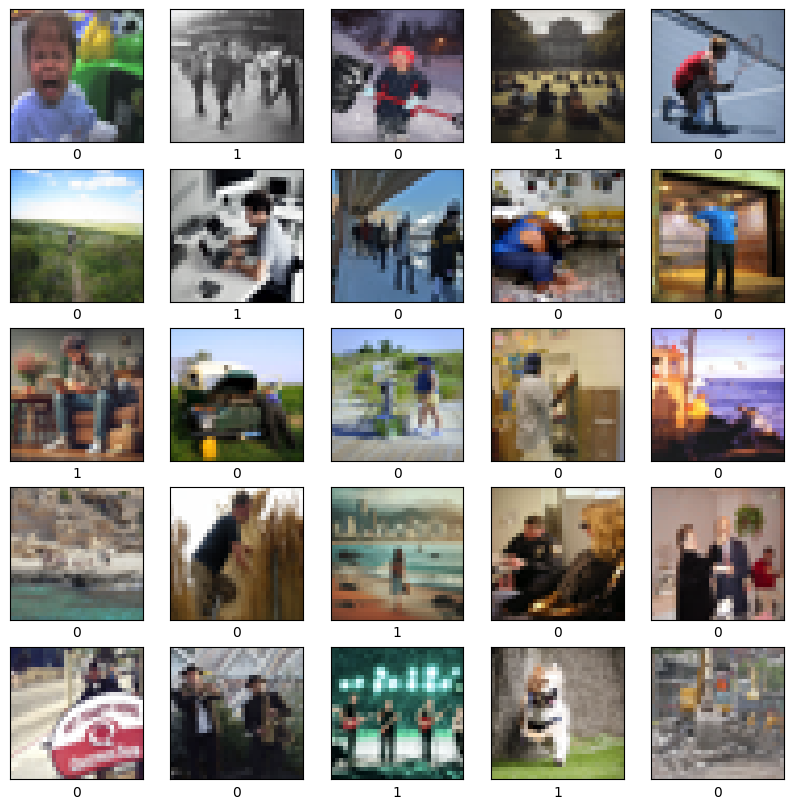

In [54]:
class_names = ['0', '1']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

Обучение CNN

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 4)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_crossentropy'])

model.fit(train_img, train_labels, epochs=15, validation_data=(test_img, test_labels))

Epoch 1/15


c:\mArt\dataScience\kaggle\attempt_at_writing\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6313 - sparse_categorical_crossentropy: 0.6313 - val_loss: 0.3886 - val_sparse_categorical_crossentropy: 0.3898
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4520 - sparse_categorical_crossentropy: 0.4520 - val_loss: 0.3995 - val_sparse_categorical_crossentropy: 0.4005
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3822 - sparse_categorical_crossentropy: 0.3822 - val_loss: 0.3921 - val_sparse_categorical_crossentropy: 0.3924
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3600 - sparse_categorical_crossentropy: 0.3600 - val_loss: 0.5172 - val_sparse_categorical_crossentropy: 0.5172
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3930 - sparse_categorical_crossentropy: 0.3930 - val_loss: 0.4296 - val_sparse_categorical_crossentropy: 0.4320
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3087 - sparse_categorical_crossentropy: 0.3087 - val_loss: 0.4231 - val_sparse_catego

In [56]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print('Test metric:', test_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4141 - sparse_categorical_crossentropy: 0.4147 
Test metric: 0.44430461525917053


In [57]:
predictions = model.predict(t_img)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [58]:
predictions

array([[0.5060087 , 0.49399137],
       [0.79725707, 0.20274292],
       [0.20818062, 0.7918194 ],
       ...,
       [0.94198614, 0.05801382],
       [0.9101095 , 0.08989044],
       [0.81562084, 0.1843792 ]], dtype=float32)

In [59]:
output = result_test_df
output = output.drop(['val_arr'], axis=1)

pred = []
for i in range(predictions.shape[0]):
    pred.append(predictions[i][1])

res_target = pd.DataFrame({'target': pred})
res = output.join(res_target)
res.to_csv('submission.csv', index=False)
print('Submission successfully saved')

Submission successfully saved


Костыль - формаирование нужного файла

In [79]:
crutch_test = pd.read_csv('data/test.csv')
crutch_sub = pd.read_csv('submission.csv')
crutch_sub = crutch_sub.rename(columns={'id':'id_res'})
crutch_res = crutch_test.join(crutch_sub)
crutch_res = crutch_res.drop({'id_res'}, axis=1)

crutch_res.to_csv('my_submission_1.csv', index=False)
print('Submission successfully saved')

Submission successfully saved
